<a href="https://colab.research.google.com/github/mavallejos93/AnaliticaDatosPhyton/blob/master/Copia_de_Predicci%C3%B3n_de_precios_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#1. Problema, predicir el precio promedio de una casa en california según las características del barrio

- Variable a predicir: Precio promedio de una casa

- Es un problema Regresión

# 2. Cargar los datos y entender los datos

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/camilousa/datasets/master/housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#3. Dividir el conjunto de datos en entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=12) # 30% para pruebas y 70% para entrenar

In [ ]:
df.shape

(20640, 10)

In [ ]:
train.shape

(14448, 10)

In [ ]:
test.shape

(6192, 10)

In [ ]:
train[['housing_median_age', 'population', 'median_income']].mean()

housing_median_age      28.629499
population            1422.771249
median_income            3.867494
dtype: float64

In [ ]:
test[['housing_median_age', 'population', 'median_income']].mean()

housing_median_age      28.662791
population            1431.789567
median_income            3.878084
dtype: float64

#4.Exploración y visualización de datos (usar obligatoriamente train)

In [ ]:
import matplotlib.pyplot as plt

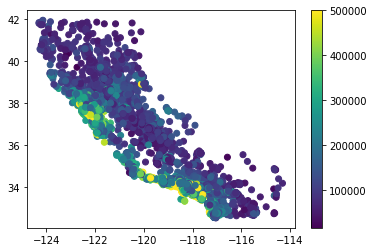

In [ ]:
plt.scatter(train['longitude'], train['latitude'],
            c=train['median_house_value'])
plt.colorbar()



In [ ]:
train.groupby(by='ocean_proximity')['median_house_value'].mean().sort_values()

ocean_proximity
INLAND        124444.024697
<1H OCEAN     239552.481678
NEAR OCEAN    251238.100492
NEAR BAY      259761.509470
ISLAND        400550.000000
Name: median_house_value, dtype: float64

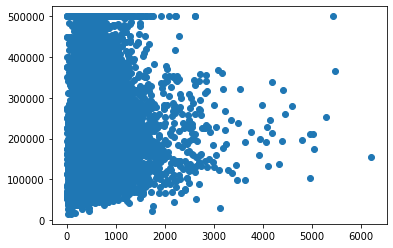

In [ ]:
plt.scatter(train['total_bedrooms'], train['median_house_value'])

In [ ]:
train['avg_bed_rooms'] = train['total_bedrooms']/train['households']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


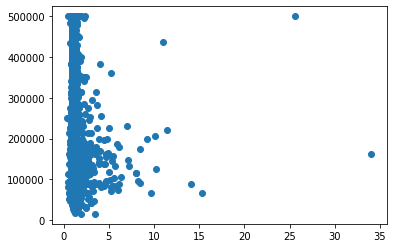

In [ ]:
plt.scatter(train['avg_bed_rooms'], train['median_house_value'] )

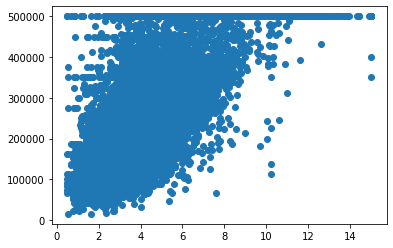

In [ ]:
plt.scatter(train['median_income'], train['median_house_value'] )

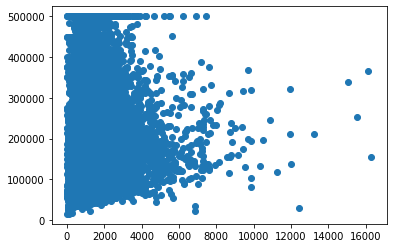

In [ ]:
plt.scatter(train['population'], train['median_house_value'] )

In [ ]:
train['avg_people'] = train['population']/train['households']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


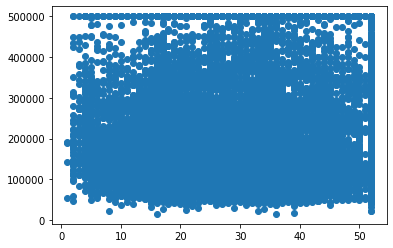

In [ ]:
plt.scatter(train['housing_median_age'], train['median_house_value'] )

#5. Preprocesamiento de los datos


In [ ]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bed_rooms,avg_people
5281,-118.49,34.05,42.0,1918.0,216.0,632.0,224.0,15.0001,500001.0,<1H OCEAN,0.964286,2.821429
11596,-118.08,33.79,34.0,2840.0,395.0,1127.0,396.0,7.6144,376200.0,<1H OCEAN,0.997475,2.845960
12808,-121.47,38.63,29.0,2197.0,520.0,1374.0,483.0,2.1889,69300.0,INLAND,1.076605,2.844720
9591,-120.45,37.32,21.0,1318.0,202.0,618.0,197.0,4.8214,117800.0,INLAND,1.025381,3.137056
15824,-122.42,37.75,52.0,1974.0,525.0,935.0,465.0,2.7173,300000.0,NEAR BAY,1.129032,2.010753
...,...,...,...,...,...,...,...,...,...,...,...,...
3714,-118.40,34.19,35.0,2180.0,599.0,1483.0,574.0,3.0395,191300.0,<1H OCEAN,1.043554,2.583624
7409,-118.22,33.96,42.0,1380.0,331.0,1290.0,288.0,2.8000,161800.0,<1H OCEAN,1.149306,4.479167
19709,-121.63,39.18,13.0,1907.0,347.0,821.0,367.0,2.0978,134000.0,INLAND,0.945504,2.237057
5787,-118.24,34.15,19.0,4852.0,1465.0,3171.0,1332.0,2.5924,192900.0,<1H OCEAN,1.099850,2.380631


## 5.1 Limpieza de datos (datos faltantes, eliminar outliers, eliminar datos poco confiables o significativos)

In [ ]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bed_rooms,avg_people
count,14448.000000,14448.000000,14448.000000,14448.000000,14300.000000,14448.000000,14448.000000,14448.000000,14448.000000,14300.000000,14448.000000
mean,-119.573272,35.637887,28.629499,2642.700166,539.679231,1422.771249,500.495293,3.867494,206517.516334,1.100786,3.119259
std,2.002041,2.137198,12.573097,2160.562872,419.502797,1081.120079,380.176392,1.886384,115243.906333,0.528253,12.383559
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.375000,0.692308
25%,-121.790000,33.940000,18.000000,1461.000000,298.000000,793.000000,281.000000,2.566700,119400.000000,1.005857,2.426824
50%,-118.505000,34.260000,29.000000,2151.000000,438.000000,1172.000000,412.000000,3.536450,179500.000000,1.049409,2.817295
75%,-118.010000,37.720000,37.000000,3163.000000,652.000000,1729.000000,607.000000,4.733800,264325.000000,1.100228,3.276113
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,34.066667,1243.333333


opción 1: Eliminar columna

In [ ]:
train.drop(['total_bedrooms', 'avg_bed_rooms'], axis=1).describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,avg_people
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.573272,35.637887,28.629499,2642.700166,1422.771249,500.495293,3.867494,206517.516334,3.119259
std,2.002041,2.137198,12.573097,2160.562872,1081.120079,380.176392,1.886384,115243.906333,12.383559
min,-124.300000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000,0.692308
25%,-121.790000,33.940000,18.000000,1461.000000,793.000000,281.000000,2.566700,119400.000000,2.426824
50%,-118.505000,34.260000,29.000000,2151.000000,1172.000000,412.000000,3.536450,179500.000000,2.817295
75%,-118.010000,37.720000,37.000000,3163.000000,1729.000000,607.000000,4.733800,264325.000000,3.276113
max,-114.310000,41.950000,52.000000,39320.000000,16305.000000,5358.000000,15.000100,500001.000000,1243.333333


In [ ]:
# opción 2 Eliminar las filas


In [ ]:
train[~train['total_bedrooms'].isna()].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bed_rooms,avg_people
count,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000
mean,-119.574228,35.639425,28.621329,2644.308252,539.679231,1422.479301,500.458601,3.867405,206514.494476,1.100786,3.120507
std,2.001688,2.137880,12.577982,2163.915403,419.502797,1081.169643,379.835913,1.885108,115256.708302,0.528253,12.447242
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.375000,0.692308
25%,-121.790000,33.940000,18.000000,1462.000000,298.000000,794.000000,281.000000,2.566775,119300.000000,1.005857,2.426267
50%,-118.510000,34.260000,29.000000,2152.000000,438.000000,1173.000000,412.000000,3.538500,179500.000000,1.049409,2.816739
75%,-118.010000,37.720000,37.000000,3162.000000,652.000000,1727.000000,607.000000,4.733800,264300.000000,1.100228,3.275749
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,34.066667,1243.333333


In [ ]:
# opción 3 . Llenar los datos faltantes
# llenar con la media, mediana o moda
# llenar con una constante

train['total_bedrooms'].fillna(train['total_bedrooms'].median())


5281      216.0
11596     395.0
12808     520.0
9591      202.0
15824     525.0
          ...  
3714      599.0
7409      331.0
19709     347.0
5787     1465.0
14155     614.0
Name: total_bedrooms, Length: 14448, dtype: float64

## 5.2 Escalar los datos(dejar las variables todas en la misma escala)

In [ ]:
# opción 1 Normalizar: Dejar todas las variables rango fijo por lo general 0 y 1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train[['longitude', 'latitude', 'housing_median_age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(train[['longitude', 'latitude', 'housing_median_age']]).max(axis=0)

array([1., 1., 1.])

In [ ]:
# opción 2
# Estandarizar 

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(train[['longitude', 'latitude', 'housing_median_age']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.transform(train[['longitude', 'latitude', 'housing_median_age']]).min(axis=0)

array([-2.361037  , -1.44955896, -2.19758548])

In [ ]:
scaler.transform(train[['longitude', 'latitude', 'housing_median_age']]).max(axis=0)

array([2.62904458, 2.95355524, 1.85883479])

#5.3 Convertir variables categóricas en numéricas

##5.2 